## Marketing Campaign and Sales Analysis

### Table of Content
1. Introduction
2. Data Loading and Quality
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations (Optimal Sales)

### 1. Introduction

- What is the impact of each marketing strategy and sales visit on Sales (Amount Collected)?
- Is the same strategy valid for all the different client types ?


### 2. Data Loading and Quality Checks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:

from google.colab import files
uploaded = files.upload()

Saving Campaign-Data.csv to Campaign-Data.csv


In [4]:
data=pd.read_csv('Campaign-Data.csv')
data.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [5]:
data.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


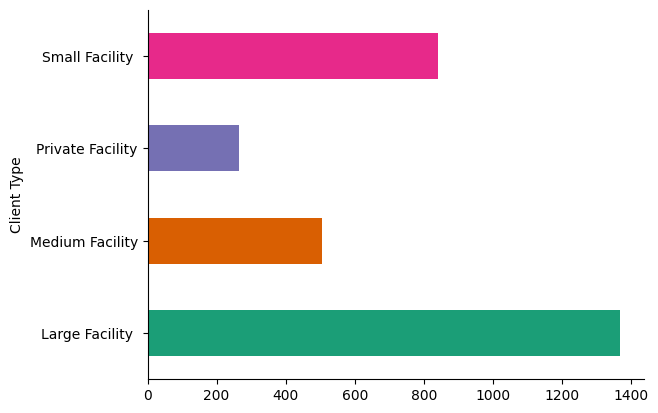

In [6]:
# @title Client Type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Client Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### 3. Feature Additions and Engineering

In [9]:
## Creation of Additional Features
data['Calendardate']=pd.to_datetime(data['Calendardate'])
data['Calendar_Month']=data['Calendardate'].dt.month
data['Calendar_Year']=data['Calendardate'].dt.year

<ipython-input-9-2cf5ad46f654>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Calendardate']=pd.to_datetime(data['Calendardate'])


### 4. Exploratory Data Analysis and Statistical Analysis
We can have a detailed exploration that can be added to this section, but since we only need to answer three questions:

<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different accounts
2. Difference of Sales in Account Types (Using Categorical Mean)

<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression)
2. Impact of Competition on Sales
3. How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)

### 4.2 Impact of Marketing Strategy on Sales

#### Understanding of distrubtions

In [10]:
data['Client Type'].value_counts(normalize=True)

,proportion
Client Type,
Large Facility,0.459677
Small Facility,0.282258
Medium Facility,0.169355
Private Facility,0.088710


In [11]:
pd.crosstab(data['Number of Competition'],data['Client Type'],margins=True,normalize='columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


In [19]:

print(data.groupby('Number of Competition').mean(numeric_only=True))

                       Number of Customers  Montly Target  Zip Code  \
Number of Competition                                                 
High                           1456.935484      75.080645    1003.0   
Low                            1456.935484      75.080645    1003.0   

                       Amount Collected   Unit Sold  Campaign (Email)  \
Number of Competition                                                   
High                       2.974789e+07  213.127016     105398.938508   
Low                        1.445570e+07  103.132258     150862.165766   

                       Campaign (Flyer)  Campaign (Phone)  Sales Contact 1  \
Number of Competition                                                        
High                      994046.717540      45198.036895    146945.564516   
Low                       623692.979839      26693.304194    128219.758065   

                       Sales Contact 2  Sales Contact 3  Sales Contact 4  \
Number of Competition            

In [21]:
data.groupby('Client Type').mean(numeric_only=True)

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


In [25]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation on the numeric data
print(numeric_data.corr()[['Amount Collected']])

                     Amount Collected
Number of Customers          0.607496
Montly Target                0.608204
Zip Code                          NaN
Amount Collected             1.000000
Unit Sold                    0.997515
Campaign (Email)             0.248235
Campaign (Flyer)             0.444337
Campaign (Phone)             0.034858
Sales Contact 1              0.277478
Sales Contact 2              0.552112
Sales Contact 3              0.357887
Sales Contact 4              0.236165
Sales Contact 5              0.095795
Calendar_Month               0.139425
Calendar_Year                0.286194


Correlation Analysis

In [32]:
## Consolidated Strategy for Targeting

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(numeric_data[['Amount Collected',
'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Amount Collected']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)',ascending=False)
# Use the format method instead of set_precision for newer pandas versions
correlation_analysis.style.background_gradient(cmap=cm).format({'Degree of Linear Impact (Correlation)': '{:.2f}'})

,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


#### Market Strategy Impact on Sales (Broken by different account type)

In [35]:
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data.groupby('Client Type')[['Amount Collected',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Amount Collected'].reset_index(drop=True)
# Use the format method instead of set_precision for newer pandas versions
correlation_analysis.style.background_gradient(cmap=cm).format({'Degree of Linear Impact (Correlation)': '{:.2f}'})

,Acc Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.219759
1,Small Facility,Sales Contact 3,0.068269
2,Small Facility,Campaign (Email),0.060200
3,Small Facility,Campaign (Flyer),0.040600
4,Small Facility,Sales Contact 4,0.024401
5,Small Facility,Sales Contact 5,0.000927
6,Small Facility,Sales Contact 1,-0.015594
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.574481
9,Private Facility,Campaign (Flyer),0.280098


#### Regression Analysis (Market Sales and Strategies)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        08:22:53   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [37]:
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

<ipython-input-37-90b464e759d5>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]


In [38]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,1.481000e+06
2,Campaign_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


#### Regression Analysis (Market Sales and Strategies) - Broken for different account types

In [43]:
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]

# Create an empty list to store the dataframes
list_of_dfs = []

for acctype in list(set(list(data['Client_Type']))):
    print(acctype)
    temp_data=data[data['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']

    # Append the generated dataframe to the list
    list_of_dfs.append(df)

    print(results.summary())

# Concatenate all dataframes in the list into a single dataframe
consolidated_summary = pd.concat(list_of_dfs, ignore_index=True)


Private Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     16.88
Date:                Tue, 20 May 2025   Prob (F-statistic):           4.63e-20
Time:                        08:38:13   Log-Likelihood:                -4650.8
No. Observations:                 264   AIC:                             9320.
Df Residuals:                     255   BIC:                             9352.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.439e+0

<ipython-input-43-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-43-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-43-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-43-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is depr

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Tue, 20 May 2025   Prob (F-statistic):           4.13e-57
Time:                        08:38:13   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06   2.53e+06     

In [45]:
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]

# Create an empty list to store the dataframes
list_of_dfs = []

for acctype in list(set(list(data['Client_Type']))):
    print(acctype)
    temp_data=data[data['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']

    # Append the generated dataframe to the list
    list_of_dfs.append(df)

    print(results.summary())

# Concatenate all dataframes in the list into a single dataframe
consolidated_summary = pd.concat(list_of_dfs, ignore_index=True)

Private Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     16.88
Date:                Tue, 20 May 2025   Prob (F-statistic):           4.63e-20
Time:                        08:40:13   Log-Likelihood:                -4650.8
No. Observations:                 264   AIC:                             9320.
Df Residuals:                     255   BIC:                             9352.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.439e+0

<ipython-input-45-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-45-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-45-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
<ipython-input-45-82252d05d3de>:13: FutureWarning: Passing literal html to 'read_html' is depr

### 5. Final Recommendations

Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend.

<b>Case Explanation - Medium Facility </b><br>
For Example Medium Facility shows decent results with Flyer Campiagns and each dollar spend return 4 dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. Else all other strategy shows no impact can be dropped to save cost.


In [46]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
0,Sales_Contact_2,6.622300,Private Facility
1,Sales_Contact_1,11.673100,Large Facility
2,Sales_Contact_4,10.614500,Large Facility
3,Sales_Contact_2,4.003100,Large Facility
4,Campaign_Flyer,2.720400,Large Facility
5,Sales_Contact_3,2.031600,Large Facility
6,Campaign_Phone,-3.536100,Large Facility
7,Sales_Contact_2,0.810100,Small Facility
8,Campaign_Phone,-0.000003,Small Facility
9,Campaign_Flyer,4.105900,Medium Facility


In [47]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [48]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,6.600000,Private Facility
1,Sales_Contact_1,11.700000,Large Facility
2,Sales_Contact_4,10.600000,Large Facility
3,Sales_Contact_2,4.000000,Large Facility
4,Campaign_Flyer,2.700000,Large Facility
5,Sales_Contact_3,2.000000,Large Facility
6,Campaign_Phone,-3.500000,Large Facility
7,Sales_Contact_2,0.800000,Small Facility
8,Campaign_Phone,-0.000000,Small Facility
9,Campaign_Flyer,4.100000,Medium Facility


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [51]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,$6.6,Private Facility
1,Sales_Contact_1,$11.7,Large Facility
2,Sales_Contact_4,$10.6,Large Facility
3,Sales_Contact_2,$4.0,Large Facility
4,Campaign_Flyer,$2.7,Large Facility
5,Sales_Contact_3,$2.0,Large Facility
6,Campaign_Phone,$-3.5,Large Facility
7,Sales_Contact_2,$0.8,Small Facility
8,Campaign_Phone,$-0.0,Small Facility
9,Campaign_Flyer,$4.1,Medium Facility


In [52]:
consolidated_summary.to_csv('consolidated_summary.csv')
files.download('consolidated_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
!pip3 freeze > requirements.txt